In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

### 1. The Fuzzy Scanner

In [2]:
from matplotlib.pyplot import figure

def plot_img(image, st):
    img = image.copy()
    img = np.absolute(img)
    img = (img-np.min(img))/np.max(img)*255
    img = img.astype(np.uint8)
    figure(figsize=(5, 5), dpi=80)
    plt.imshow(img, cmap='gray')
    plt.title(st)
    plt.show()
    
def plot_pair(img_1, st1, img_2, st2):
    
    img1 = img_1.copy()
    img1 = np.absolute(img1)
    img1 = (img1-np.min(img1))/np.max(img1)*255
    img1 = img1.astype(np.uint8)
    
    img2 = img_2.copy()
    img2 = np.absolute(img2)
    img2 = (img2-np.min(img2))/np.max(img2)*255
    img2 = img2.astype(np.uint8)
    
    f, ax = plt.subplots(1, 2, figsize=(12.25, 12.25))
    ax[0].imshow(img1, cmap='gray')
    ax[0].set_title(st1)
    ax[1].imshow(img2, cmap='gray')
    ax[1].set_title(st2)
    plt.show()
    
def H_val(y, x, a=0.1, b=0.1, T=1):
    C = np.pi*(a*y+b*x)
    if(C == 0): return 1
    if np.abs(np.sin(C))<1e-6: return 1e-6
    return T*np.sin(C)*np.exp((-1j*C))/C

# Implement a blurring filter using above degradation function
def degradation_func(img):
    image = np.copy(img)
    image = image.astype(np.complex128)
    for u in range(M):
        for v in range(N):
            image[u,v] = H_val(u-M//2,v-N//2)
    return image

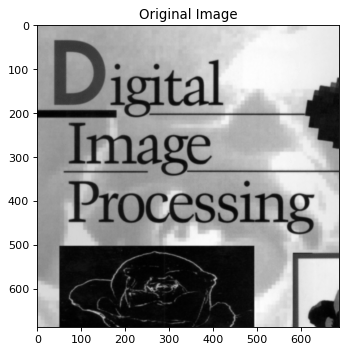

In [3]:
gray_img = cv2.imread('/home/tusharc31/Desktop/Digital-Image-Processing/Assignment-4/imgs/book.jpg', 0)
N, M = gray_img.shape
H = degradation_func(gray_img)

plot_img(gray_img, 'Original Image')

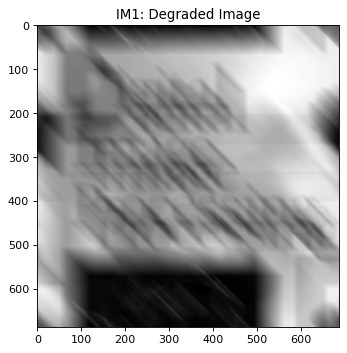

In [4]:
fft_img = np.fft.fftshift(np.fft.fft2(gray_img))
filtered_fft = fft_img * H
filtered_img = np.fft.ifft2(np.fft.ifftshift(filtered_fft))

# Blur the image book.jpg using following parameters, a = 0.1, b = 0.1 and T = 1
plot_img(filtered_img, 'IM1: Degraded Image')

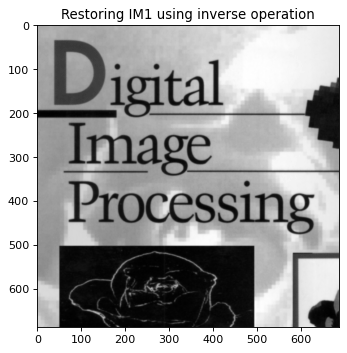

In [5]:
fft_img1 = np.fft.fftshift(np.fft.fft2(filtered_img))
filtered_fft1 = fft_img1/H
restored_img = np.fft.ifft2(np.fft.ifftshift(filtered_fft1))

plot_img(restored_img, 'Restoring IM1 using inverse operation')

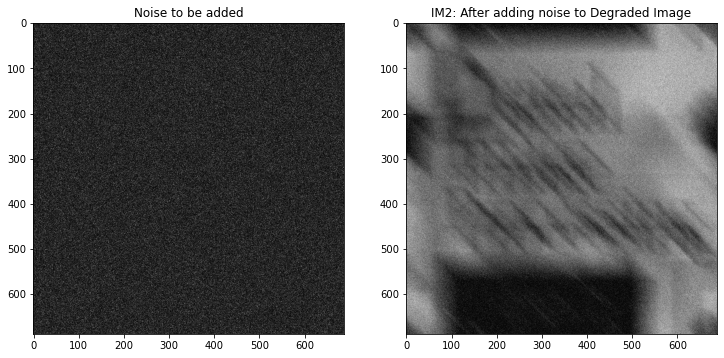

In [6]:
gaussian = np.random.normal(0, np.sqrt(650), (gray_img.shape[0], gray_img.shape[1])) 
# Add Gaussian noise of 0 mean and variance of 650 to the blurred image.
noise_img = filtered_img + gaussian

plot_pair(gaussian, 'Noise to be added', \
          noise_img, 'IM2: After adding noise to Degraded Image')

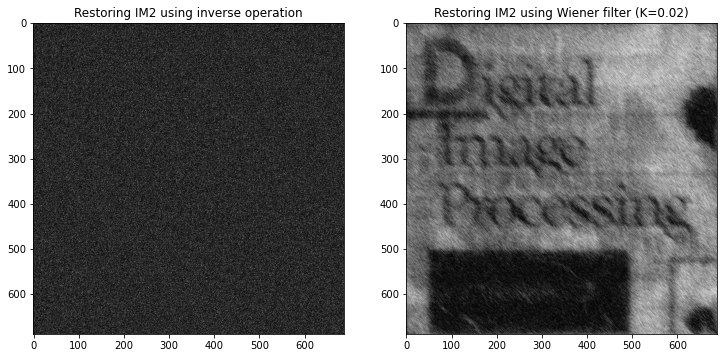

In [7]:
# Restore the blurred image using inverse filter.
fft_img1 = np.fft.fftshift(np.fft.fft2(noise_img))
filtered_fft1 = fft_img1/H
restored_img = np.fft.ifft2(np.fft.ifftshift(filtered_fft1))

# Restore the noisy blurred image using Wiener deconvolution filter.
fft_img1 = np.fft.fftshift(np.fft.fft2(noise_img))
filtered_fft1 = fft_img1/H*((np.abs(H)*np.abs(H))/(np.abs(H)*np.abs(H)+0.02))
res = np.fft.ifft2(np.fft.ifftshift(filtered_fft1))

plot_pair(restored_img, 'Restoring IM2 using inverse operation', \
          res, 'Restoring IM2 using Wiener filter (K=0.02)')

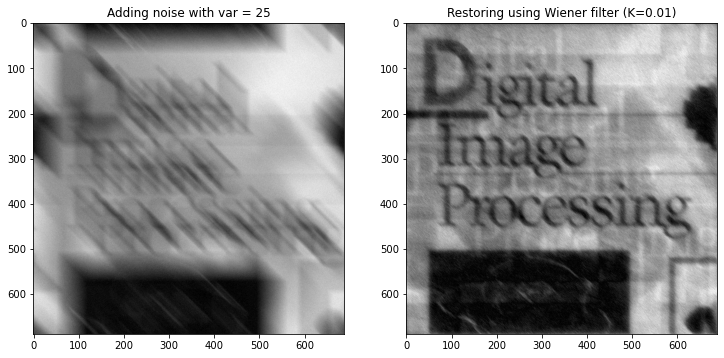

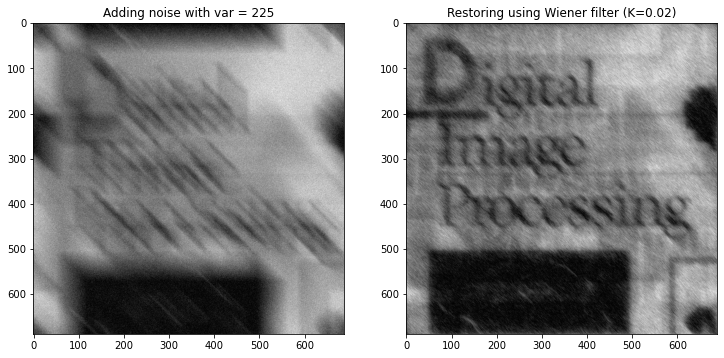

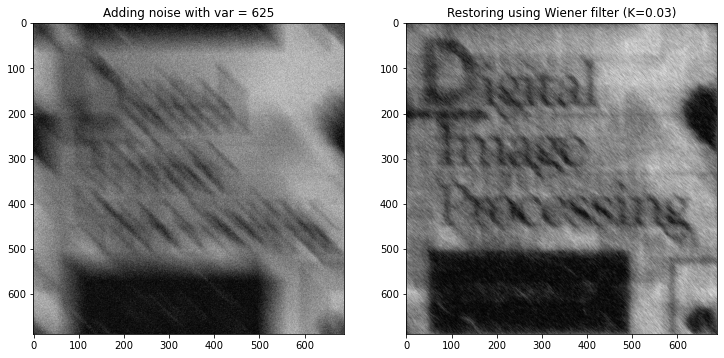

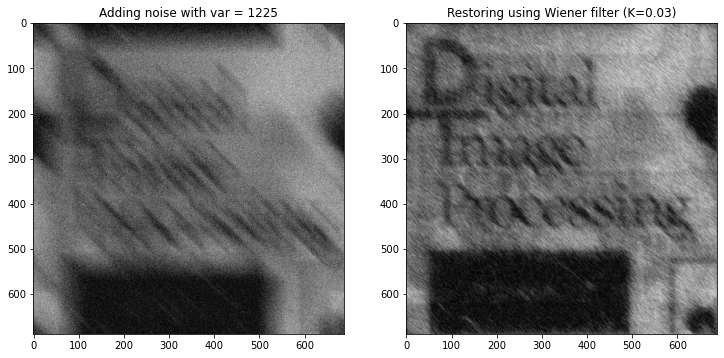

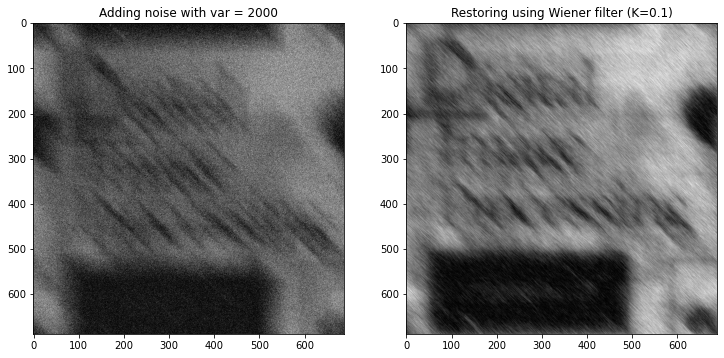

In [8]:
var = [25, 225, 625, 1225, 2000]
k = [0.01, 0.02, 0.03, 0.03, 0.1]

for i in range(5):
    
    gaussian = np.random.normal(0, np.sqrt(var[i]), (gray_img.shape[0], gray_img.shape[1])) 
    noise_img = filtered_img + gaussian
    
    fft_img1 = np.fft.fftshift(np.fft.fft2(noise_img))
    filtered_fft1 = fft_img1/H*((np.abs(H)*np.abs(H))/(np.abs(H)*np.abs(H)+k[i]))
    res = np.fft.ifft2(np.fft.ifftshift(filtered_fft1))
    
    plot_pair(noise_img, f'Adding noise with var = {var[i]}', \
              res, f'Restoring using Wiener filter (K={k[i]})')

**Performance of the Wiener Deconvolution filter:**  
The Wiener filtering is a linear estimation of the original image. It removes the additive noise and inverts the blurring simultaneously. It minimizes the overall mean square error in the process of inverse filtering and noise smoothing. However, as it can be observed, as the variance of the Gaussian Noise increases, the inversion process become

### 2. Data transfer

**[IMPORTANT NOTE]**: My jupyter-notebook kernel keeps dying when running the `test.raw` image for the below algorithms (except Huffman). Hence, I've shown the results on a different image in this notebook.

In [1]:
import os
import sys
import cv2
import time
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt

In [2]:
def show(img, figsize=(5, 5), title='Image'):
    figure = plt.figure(figsize=figsize)
    plt.imshow(img)
    plt.show()
    
def get_size(filename):
    stat = os.stat(filename)
    size = stat.st_size
    return size

**Huffman Coding**

In [9]:
class Vertex :
    
    def assign_side(self,side):
        self.side = side
        
    def __init__(self, id, char=-1, val=-1, l_child=None, r_child=None):
        self.side = 0
        self.l_child, self.r_child = l_child, r_child
        self.id = id
        self.H = None
        if(char != -1):
            self.symbol, self.val = char, val
        else:
            self.symbol, self.val = -1, l_child.val+r_child.val
            l_child.assign_side(-1)
            r_child.assign_side(1)
            
class Huffman:
    
    def __init__(self,img):
        self.img = img
        self.h, self.w, self.c = self.img.shape
        self.root = None
        self.decoded = []
        self.data = img.flatten()
        self.next_id = 0
        self.final = {}
        self.enc_d = ""
        
        self.p = {}
        for i in range(self.h*self.w*self.c):
            if self.data[i] not in self.p.keys():
                self.p[self.data[i]] = 0
            self.p[self.data[i]] += 1/(self.h*self.w*self.c)
            
    def merge(self,Nodes):
        small_node, next_small_node = None, None
        small, next_small = 1e16, 1e15
        for node in Nodes:
            if(small > node.val):
                next_small, next_small_node = small, small_node
                small, small_node = node.val, node
            elif(next_small > node.val):
                next_small, next_small_node = node.val, node
        small_node_id, next_small_node_id = small_node.id, next_small_node.id
        New_Nodes = []
        for i in range(len(Nodes)):
            node = Nodes[i]
            if node.id != small_node_id:
                if node.id != next_small_node_id:
                    New_Nodes.append(node)
        New_Node = Vertex(self.next_id,l_child=next_small_node,r_child=small_node)
        self.next_id += 1
        New_Nodes.append(New_Node)
        return New_Nodes
        
    def forward_pass(self, sz=0):
        Nodes = []
        for char in self.p.keys():
            Nodes.append(Vertex(self.next_id,char,self.p[char]))
            sz += 1
            self.next_id += 1
        while sz != 1 :
            Nodes = self.merge(Nodes)
            sz = len(Nodes)
        self.root = Nodes[0]
    
    def iterate_tree(self,node,string):
        if(node.symbol == -1):
            if(node.l_child != None):
                l_child_string = string + '0'
                self.iterate_tree(node.l_child,l_child_string)
            if(node.r_child != None):
                r_child_string = string + '1'
                self.iterate_tree(node.r_child,r_child_string)
        else:
            self.final[node.symbol] = string
    
    def get_length(self):
        result = ""
        for i in range(len(self.data)):
            result = result + self.final[self.data[i]]
        self.enc_d = result
        return len(self.enc_d)
    
    def decoding(self, index=0):
        total_size = len(self.enc_d)
        while(index < total_size):
            index = self.find_root(self.root,index)
        original_shape = (self.h,self.w,self.c)
        return np.reshape(np.array(self.decoded), original_shape)
    
    def find_root(self,node,index):
        if(node.symbol == -1):
            if(self.enc_d[index] == '0'):
                return self.find_root(node.l_child, 1+index)
            elif(self.enc_d[index] == '1'):
                return self.find_root(node.r_child,1+index)
        else:
            self.decoded.append(node.symbol)
            return index

In [6]:
img = cv2.imread("../imgs/test.raw")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

t1 = time.time()
Hufftree = Huffman(img)
Hufftree.forward_pass()
Hufftree.iterate_tree(Hufftree.root,"")
fin_len = Hufftree.get_length()
t2 = time.time()
print(f"Compressed in {int(t2-t1)} seconds")

t1 = time.time()
new_img = Hufftree.decoding()
t2 = time.time()
print(f"Decompressed in {int(t2-t1)} seconds")
    
print(f"Matching both images: {np.all(new_img==img)}")
print(f"Length of Encoded string : {fin_len}")
print(f"Length of Original string: {img.shape[0]*img.shape[1]*img.shape[2]*8}")

Compressed in 117 seconds
Decompressed in 504 seconds
Matching both images: True
Length of Encoded string : 1148488405
Length of Original string: 1207701504


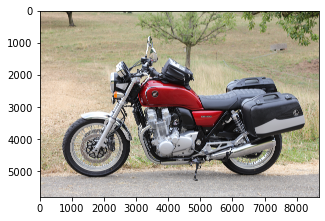

In [7]:
show(new_img)

In [12]:
img = cv2.imread("../imgs/test2.png")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

t1 = time.time()
Hufftree = Huffman(img)
Hufftree.forward_pass()
Hufftree.iterate_tree(Hufftree.root,"")
fin_len = Hufftree.get_length()
t2 = time.time()
print(f"Compressed in {t2-t1} seconds")

t1 = time.time()
new_img = Hufftree.decoding()
t2 = time.time()
print(f"Decompressed in {t2-t1} seconds")
    
print(f"Matching both images: {np.all(new_img==img)}")
print(f"Length of Encoded string : {fin_len}")
print(f"Length of Original string: {img.shape[0]*img.shape[1]*img.shape[2]*8}")

Compressed in 0.0675969123840332 seconds
Decompressed in 0.10876154899597168 seconds
Matching both images: True
Length of Encoded string : 87891
Length of Original string: 617160


**Run-length encoding (RLE)**

In [4]:
def RLE_encode(img, shape):
    cnt = 0
    lst = -1
    encoded = []
    for val in img.flatten():
        if lst!=-1:
            if lst==val:
                cnt+=1
            if lst!=val:
                encoded.append((cnt, lst))
                lst=val
                cnt=1
        else:
            lst=val
            cnt=1
    encoded.append((cnt, lst))
    encoded = np.array(encoded)
    return encoded

def RLE_decode(encoded, shape):
    decoded=[]
    for cnt, val in encoded:
        decoded.extend([val]*cnt)
    decoded = np.array(decoded).reshape(shape)
    decoded = decoded.astype(np.uint8)
    return decoded

In [16]:
img = cv2.imread("../imgs/test.raw")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
shape = img.shape[:2]
# show(img)

t1 = time.time()
r_enc = RLE_encode(img[:, :, 0], shape)
g_enc = RLE_encode(img[:, :, 1], shape)
b_enc = RLE_encode(img[:, :, 2], shape)
t2 = time.time()
print(f"Compressed in {t2-t1} seconds")

t1 = time.time()
r_dec = RLE_decode(r_enc, shape)
g_dec = RLE_decode(g_enc, shape)
b_dec = RLE_decode(b_enc, shape)
t2 = time.time()
print(f"Decompressed in {t2-t1} seconds")

print("Matching R-channel:", np.all(r_dec==img[:,:,0]))
print("Matching G-channel:", np.all(g_dec==img[:,:,1]))
print("Matching B-channel:", np.all(b_dec==img[:,:,2]))

rf1 = '../results/RLE/compressed/re.tif'
gf1 = '../results/RLE/compressed/ge.tif'
bf1 = '../results/RLE/compressed/be.tif'
cv2.imwrite(rf1, r_enc)
cv2.imwrite(gf1, g_enc)
cv2.imwrite(bf1, b_enc)

rf2 = '../results/RLE/decompressed/re.tif'
gf2 = '../results/RLE/decompressed/ge.tif'
bf2 = '../results/RLE/decompressed/be.tif'
cv2.imwrite(rf2, r_dec)
cv2.imwrite(gf2, g_dec)
cv2.imwrite(bf2, b_dec)

print('Size of compressed file:', (get_size(rf1)+get_size(gf1)+get_size(bf1)))
print('Size of de-compressed file:', (get_size(rf2)+get_size(gf2)+get_size(bf2)))

Compressed in 226.07654690742493 seconds
Decompressed in 105.83153557777405 seconds
Matching R-channel: True
Matching G-channel: True
Matching B-channel: True
Size of compressed file: 133901192
Size of de-compressed file: 70000628


In [11]:
img = cv2.imread("../imgs/test2.png")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
shape = img.shape[:2]
# show(img)

t1 = time.time()
r_enc = RLE_encode(img[:, :, 0], shape)
g_enc = RLE_encode(img[:, :, 1], shape)
b_enc = RLE_encode(img[:, :, 2], shape)
t2 = time.time()
print(f"Compressed in {t2-t1} seconds")

t1 = time.time()
r_dec = RLE_decode(r_enc, shape)
g_dec = RLE_decode(g_enc, shape)
b_dec = RLE_decode(b_enc, shape)
t2 = time.time()
print(f"Decompressed in {t2-t1} seconds")

print("Matching R-channel:", np.all(r_dec==img[:,:,0]))
print("Matching G-channel:", np.all(g_dec==img[:,:,1]))
print("Matching B-channel:", np.all(b_dec==img[:,:,2]))

rf1 = '../results/RLE/compressed/re.tif'
gf1 = '../results/RLE/compressed/ge.tif'
bf1 = '../results/RLE/compressed/be.tif'
cv2.imwrite(rf1, r_enc)
cv2.imwrite(gf1, g_enc)
cv2.imwrite(bf1, b_enc)

rf2 = '../results/RLE/decompressed/re.tif'
gf2 = '../results/RLE/decompressed/ge.tif'
bf2 = '../results/RLE/decompressed/be.tif'
cv2.imwrite(rf2, r_dec)
cv2.imwrite(gf2, g_dec)
cv2.imwrite(bf2, b_dec)

print('Size of compressed file:', (get_size(rf1)+get_size(gf1)+get_size(bf1)))
print('Size of de-compressed file:', (get_size(rf2)+get_size(gf2)+get_size(bf2)))

Compressed in 0.08864259719848633 seconds
Decompressed in 0.006555318832397461 seconds
Matching R-channel: True
Matching G-channel: True
Matching B-channel: True
Size of compressed file: 3180
Size of de-compressed file: 5190


**LZW**

In [3]:
class LZW:
    def __init__(self, path):
        self.path = path
        self.red = []
        self.green = []
        self.blue = []
        
        self.comp_pos=11
        self.decomp_pos=11
        self.comp_dict = {}
        self.decomp_dict = {}
        
        for i in range(self.comp_pos):
            if i==10: self.comp_dict[','] = 10
            else: self.comp_dict[str(i)] = i
                
        for i in range(self.decomp_pos):
            if i==10: self.decomp_dict[i] = ','
            else: self.decomp_dict[i] = str(i)

    def compress(self):
        self.image = cv2.cvtColor(cv2.imread(self.path), cv2.COLOR_BGR2RGB)
        rgbs = self.image.reshape((-1, 3))
        itr = 0
        sep = "\n"
        d1 = self.image.shape[0]
        d2 = self.image.shape[1]
        for i in range(d1):
            R, G, B = "","",""
            for j in range(d2):
                R += str(rgbs[itr][0]) + ","
                G += str(rgbs[itr][1]) + ","
                B += str(rgbs[itr][2]) + ","
                itr += 1
            self.red.append(R[:-1])
            self.green.append(G[:-1])
            self.blue.append(B[:-1])
        comp_cd = []
        channels = [self.red, self.green, self.blue]
        for ch in channels:
            comp_cd.append(self.comp_channel(ch))
        with open("../results/LZW/compressed/img.lzw",'w') as file:
            d1 = len(comp_cd)
            for i in range(d1):
                for j in range(len(comp_cd[i])):
                    file.write(comp_cd[i][j])
                    file.write(sep)
                
    def comp_channel(self, list_clr):
        channel_vals = []
        rng = len(list_clr)
        for _ in range(rng):
            cumsym = list_clr[_][0]
            cdr = ""
            for char_pos in range(1, len(list_clr[_])):
                curr_ch = list_clr[_][char_pos]
                if cumsym+curr_ch not in self.comp_dict:
                    cdr += str(self.comp_dict[cumsym])
                    cdr += ","
                    self.comp_dict[cumsym+curr_ch] = self.comp_pos
                    self.comp_pos += 1
                    cumsym = curr_ch
                else:
                    cumsym += curr_ch
                curr_ch = ""
            channel_vals.append(cdr + str(self.comp_dict[cumsym]))
        self.lstl = len(channel_vals)
        return channel_vals
    
    def fetchline(self, line, sep=","):
        entry = ""
        curr_r = line.split(sep)
        curr_r[-1] = curr_r[-1][:-1]
        trans_r = self.decomp_dict[int(curr_r[0])]
        word = self.decomp_dict[int(curr_r[0])]
        d = len(curr_r)
        
        for i in range(1,d):
            if int(curr_r[i]) not in self.decomp_dict:
                entry = word + word[0]
                add = word + word[0]
            else:
                entry = self.decomp_dict[int(curr_r[i])]
                add = word + entry[0]
            word = entry
            trans_r += entry
            self.decomp_dict[self.decomp_pos] = add
            self.decomp_pos=self.decomp_pos+1
        
        return [int(x) for x in trans_r.split(',')]
    
    def decompress(self):
        image = []
        with open("../results/LZW/compressed/img.lzw","r") as file:
            for line in file:
                image.append(np.array(self.fetchline(line)))
        image = np.array(image)
        d1 = image.shape[0]//3
        d2 = image.shape[1]
        image = image.reshape((3, d1, d2))
        imagesize = (d2, d1)
        imagelist = []
        for i in range(d1):
            for j in range(d2):
                imagelist.append((image[0][i][j],image[1][i][j],image[2][i][j]))
        imagenew = Image.new('RGB',imagesize)
        imagenew.putdata(imagelist)
        imagenew.save("../results/LZW/decompressed/img.tif")

In [ ]:
encoder = LZW('../imgs/test.raw')

t1 = time.time()
encoder.compress()
t2 = time.time()
print(f"Compressed in {int(t2-t1)} seconds")

t1 = time.time()
encoder.decompress()
t2 = time.time()
print(f"De-compressed in {int(t2-t1)} seconds")

img1 = cv2.imread('../imgs/test.raw')
img2 = cv2.imread('../results/LZW/decompressed/img.tif')
print(f'Matching both images: {np.all(img1==img2)}')
print(f"Size of compressed file: {get_size('../results/LZW/compressed/img.lzw')}")
print(f"Size of decompressed file: {get_size('../results/LZW/decompressed/img.tif')}")

Compressed in 503 seconds


[Note] Kernel died after compression

Compressed in 0.9406728744506836 seconds
De-compressed in 0.14252376556396484 seconds


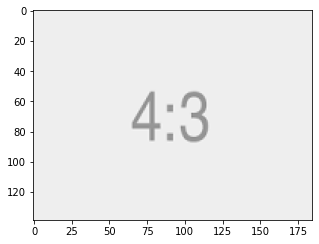

Matching both images: True
Size of compressed file: 16762
Size of decompressed file: 77285


In [4]:
encoder = LZW('../imgs/test2.png')

t1 = time.time()
encoder.compress()
t2 = time.time()
print(f"Compressed in {t2-t1} seconds")

t1 = time.time()
encoder.decompress()
t2 = time.time()
print(f"De-compressed in {t2-t1} seconds")

img1 = cv2.imread('../imgs/test2.png')
img2 = cv2.imread('../results/LZW/decompressed/img.tif')
show(img2)
print(f'Matching both images: {np.all(img1==img2)}')
print(f"Size of compressed file: {get_size('../results/LZW/compressed/img.lzw')}")
print(f"Size of decompressed file: {get_size('../results/LZW/decompressed/img.tif')}")

**Discrete Cosine Transform**  
Took rounding factor as 4, compression percentage as 50 and restrictingFactor as 5.

In [17]:
def calculateDCT(M):
    A = np.random.randn(8,8)
    for i in range(8):
        for j in range(8):
            if i>0: A[i,j] = np.sqrt(1/4) * np.cos(((2*j + 1)*i*np.pi)/16)
            else: A[i,j] = 1/np.sqrt(8)
            A[i,j] = np.round(A[i,j], 4)
    return np.round(A @ M @ A.T,4)

def compressedInformation(Y):
    res = np.random.randn(5,5,1)
    Q = np.array([[16,11,10,16,24,40,51,61],
                [12,12,14,19,26,58,60,55],
                [14,13,16,24,40,57,69,56],
                [14,17,22,29,51,87,80,62],
                [18,22,37,56,68,109,103,77],
                [24,35,55,64,81,104,113,92],
                [49,64,78,87,103,121,120,101],
                [72,92,95,98,112,100,103,99]])
    for i in range(0, Y.shape[0]-8, 8):
        for j in range(0, Y.shape[1]-8, 8):
            C = calculateDCT(Y[i:i+8, j:j+8]) // Q
            res = np.concatenate((res, C[:5,:5].reshape(5,5,1)), axis = 2)
    return res[:,:,1:]

def DCT_transform(BGRImage):
    YCrCbImage = cv2.cvtColor(BGRImage, cv2.COLOR_BGR2YCR_CB)
    Y = np.array(YCrCbImage[:,:,0]).astype(np.int16)
    Cb = np.array(YCrCbImage[:,:,1]).astype(np.int16)
    Cr = np.array(YCrCbImage[:,:,2]).astype(np.int16)

    processedY = compressedInformation(Y-128)
    processedCb = compressedInformation(Cb-128)
    processedCr = compressedInformation(Cr-128)
    
    print(f'Original size = {Y.shape[0]*Y.shape[1]*3}')
    print(f'Size after compression = {processedY.shape[0]*processedY.shape[1]*processedY.shape[2]*3}')

[Note] Unable to run on `test.raw`. Kernel keeps dying.

In [20]:
img = cv2.imread('../imgs/test2.png')
t1 = time.time()
DCT_transform(img)
t2 = time.time()
print(f'Took {t2-t1} seconds to compress')

Original size = 77145
Size after compression = 29325
Took 0.4490368366241455 seconds to compress


### Analysis

**Working with `test.raw`**
* Huffman Coding
  - Compression time = 114 seconds
  - Decompression time = 504 seconds
  - Compression ratio = 1.052
* RLE
  - Compression time = 226 seconds
  - Decompression time = 105 seconds
  - Compression ratio = 0.523
* LZW
  - Compression time = 503 seconds
  - Decompression time = Kernel dies
  - Compression ratio = Kernel dies
* DCT - jupyter-notebook kernel dies

**Working with `test2.png`**
* Huffman Coding
  - Compression time = 0.0676 seconds
  - Decompression time = 0.109 seconds
  - Compression ratio = 7.0219
* RLE
  - Compression time = 0.089 seconds
  - Decompression time = 0.007 seconds
  - Compression ratio = 1.632
* LZW
  - Compression time = 0.137 seconds
  - Decompression time = 0.047 seconds
  - Compression ratio = 4.611
* DCT
  - Compression time = 0.449 seconds
  - Compression ratio = 2.631
  
**Obsservations and Inferences**
* RLE might not be the most optimal algorithm, since it is unable to compress `test.raw`. This is most likely because the image doesn't have as much continuos streams of pixel values as needed to achieve compression. However, it is able to compress `test.png` 
* DCT is the slowest out of all due to the square complexity. Hence, the system keeps killing the kernel as it occupies resources for too long. In case of `test2.png` it is able to achieve compression but, notice that it takes the longest time.
* LZW might performs too slow (slower than Huffman and RLE) in case of `test.raw`. Hence, the kernel dies while its still decompressing.
* Huffman gives decent performance on both images. However it takes too much in the first case.